# Methods for Analyzing the Best NBA Players

#### Author: Elijah Torres-Hornbeak

#### Course Project, UC Irvine, Math 10 S24

#### I would like to post my notebook on the course’s website. Yes

## Introduction

In the NBA, many different fans of the game have differing opinions on who the best NBA players are. In this project I intend to show methods on determning who the best NBA players are in terms of scoring output, field goal percentage, and more. I found these stats through a Kaggle dataset that contained these average statistics for the 2023-2024 NBA regular season.

In [89]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor

## Altair Plots

In [90]:
df = pd.read_csv("NBA_2024_per_game(03-01-2024).csv")
df = df.dropna()
c1 = alt.Chart(df).mark_circle().encode(x = alt.X("MP"),
                                        y = alt.X("PTS"),
                                        color = "Pos",
                                        tooltip = ["Player","PTS", "AST", "TRB", "STL", "BLK"])
filtered_PTS = df[df['PTS'] > 20]
filtered_PTS
c2 = alt.Chart(filtered_PTS).mark_circle().encode(x = alt.X("MP", scale = alt.Scale(domain = (28,38))),
                                             y = alt.X("PTS", scale = alt.Scale(domain = (20,36))),
                                             color = "Pos",tooltip = ["Player","PTS", "AST", "TRB", "STL", "BLK"])

In [91]:
c1 | c2

/Users/elijahhornbeak/Downloads/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/Users/elijahhornbeak/Downloads/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/Users/elijahhornbeak/Downloads/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/Users/elijahhornbeak/Downloads/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be re

alt.HConcatChart(...)

Using Altair I was able to plot a grpah using the minutes played and points per game as the x and y-axis respectively. I also used the tooltip function within altair so that each individual point will have the players name in addition to other stats that are relavent. This is just a way to visualize the trend of minutes played and points per game. The second chart is a chart of the NBA players that scored more than 20 points per game. I also changed the bound of the x and y-axis to centralize the data better.

## Linear Regression Model and $R^2$ Value

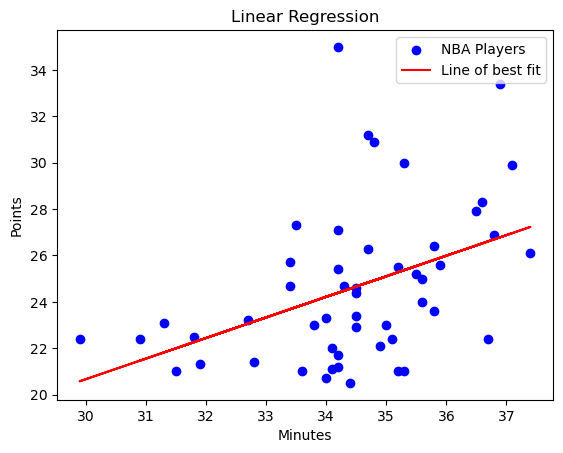

R^2 value: 0.1804183428580789


In [92]:
df = pd.DataFrame(df)
df = df[df['PTS'] > 20]
Y = df['PTS'].values
X = df['MP'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.scatter(X, Y, color='blue', label='NBA Players')
plt.plot(X, Y_pred, color='red', label='Line of best fit')
plt.xlabel('Minutes')
plt.ylabel('Points')
plt.title('Linear Regression')
plt.legend()
plt.show()
r_squared = model.score(X, Y)
print(f'R^2 value: {r_squared}')

This Linear Regression plot is using the two variables of minutes on the x-axis and points along the y-axis. I also included the $R^2$ value of the graph. The low $R^2$ value shows that the prediction of points based on minutes played is not a great one. A consequence of this is that you can see the players that are above this line, meaning the data points above the line of best fit score more on average based on the amount of minutes they play per game. You can say that these players are above average scorers for the amount of minutes they play. It also shows that there is not a clear relation between points per game and minutes played.

In [93]:
above_average_scorers = df['PTS'] > Y_pred
Players_above_average = df[above_average_scorers]
print("Players that are above average scorers:")
print(Players_above_average)

Players that are above average scorers:
                      Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  \
11     Giannis Antetokounmpo  PF   29  MIL  32  32  34.8  11.5  18.9  0.606   
25               LaMelo Ball  PG   22  CHO  15  15  33.4   8.8  19.9  0.443   
58              Devin Booker  PG   27  PHO  24  24  35.8   8.9  19.1  0.466   
113            Stephen Curry  PG   35  GSW  30  30  33.5   8.6  19.0  0.453   
125              Luka Dončić  PG   24  DAL  31  31  36.9  11.4  23.6  0.484   
131             Kevin Durant  PF   35  PHO  28  28  37.1  10.4  19.7  0.525   
134          Anthony Edwards  SG   22  MIN  29  29  34.7   9.0  19.7  0.458   
137              Joel Embiid   C   29  PHI  25  25  34.2  11.8  21.8  0.540   
147             De'Aaron Fox  PG   26  SAC  25  25  35.3  10.5  21.8  0.483   
161  Shai Gilgeous-Alexander  PG   25  OKC  30  30  34.7  11.2  20.6  0.546   
181        Tyrese Haliburton  PG   23  IND  29  29  34.3   8.8  17.6  0.501   
222         

The 23 NBA players mentioned abpove score at a higher output than the liner model predicted based on their minutes per game. There are a lot that make sense, but there are a few NBA players that many consider to not be that good such as Kyle Kuzma and Cam Thomas. Those are the players that surprised me who were above average scorers from the minutes that they played.

In [94]:
below_average_scorers = df['PTS'] <= Y_pred
Players_below_average = df[below_average_scorers]
print("Players that are below average scorers:")
print(Players_below_average)

Players that are below average scorers:
                 Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
3           Bam Adebayo   C   26  MIA  23  23  34.1  8.0  15.7  0.506  ...   
27       Paolo Banchero  PF   21  ORL  32  32  34.2  7.8  16.8  0.465  ...   
28         Desmond Bane  SG   25  MEM  31  31  34.5  9.0  19.2  0.471  ...   
32       Scottie Barnes  SG   22  TOR  33  33  35.2  7.8  16.3  0.480  ...   
65        Mikal Bridges  SF   27  BRK  33  33  34.1  7.5  16.4  0.457  ...   
74         Jaylen Brown  SF   27  BOS  30  30  33.8  8.9  18.2  0.489  ...   
78        Jalen Brunson  PG   27  NYK  33  33  35.9  9.0  19.4  0.463  ...   
84         Jimmy Butler  PF   34  MIA  24  24  33.6  6.5  14.0  0.464  ...   
111     Cade Cunningham  PG   22  DET  33  33  35.0  8.5  19.2  0.443  ...   
115       Anthony Davis   C   30  LAL  32  32  35.6  9.5  17.2  0.551  ...   
119       DeMar DeRozan  SF   34  CHI  32  32  36.7  7.8  17.0  0.455  ...   
152      Darius Garland 

These 28 NBA players are those who scored less than the model predicted, many of which made the All-Star game this year or were on the All-NBA teams, such as Scottie Barnes, Jalen Brunson, Kawhi Leonard, Anthony Davis, and Jaylen Brown to name a few. I believe that this shows that basing the quality of a player cannot only be determined through their points per game output based on minutes played and how above average they are.

## Plotly Component

We will now use a bar chart to visualize the average points per game for the NBA players that average 25 points per game or more.

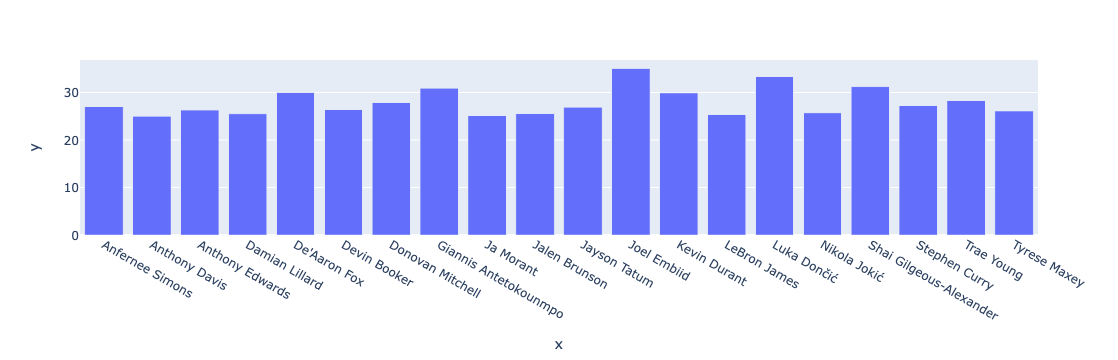

In [95]:
df_PPG = df[df['PTS'] >= 25]
PPG = pd.DataFrame(df_PPG.groupby('Player')['PTS'].mean())
bar_chart = px.bar(df_PPG, x = PPG.index, y = PPG["PTS"])
bar_chart.show()

I will create another barchart but now will have the NBA players that average a higher field goal percentage than 50%.

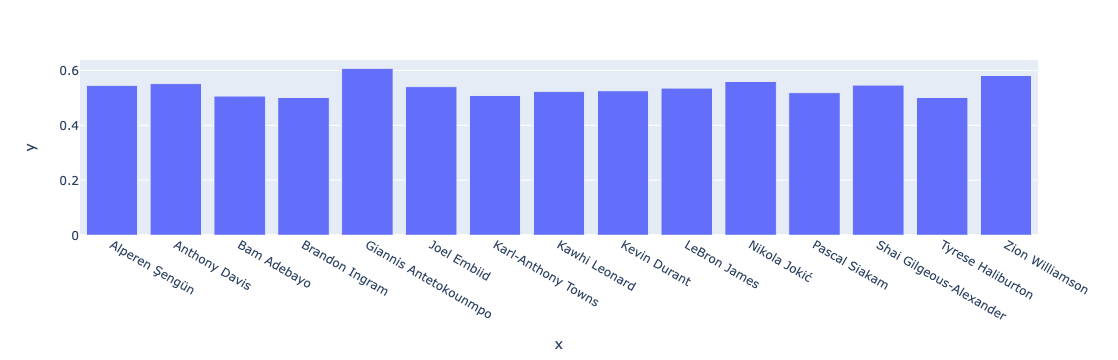

In [96]:
df_FG = df[df['FG%'] > 0.500]
FG = pd.DataFrame(df_FG.groupby('Player')['FG%'].mean())
bar_chart = px.bar(df_FG, x = FG.index, y = FG["FG%"])
bar_chart.show()

When looking at both of the bar charts, you can see some overlap in both charts with the same players such as Anthony Davis, Giannis Antetokounmpo, Joel Embiid, Kevin Durant, LeBron James, Nikola Jokić, and Shai Gilgeous-Alexander. These are the best scorers in the NBA who are the most efficient when shooting the ball.

## Correlation between the Five Main Stats and FG% and MP

In [97]:
corr_df = df_PPG[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'MP' ]]
corr_df.corr()

,PTS,TRB,AST,STL,BLK,FG%,MP
PTS,1.000000,0.273783,0.112722,0.407189,0.252402,0.346648,0.042197
TRB,0.273783,1.000000,-0.151427,0.070361,0.797259,0.810272,-0.254707
AST,0.112722,-0.151427,1.000000,0.057256,-0.361143,-0.144822,0.150785
STL,0.407189,0.070361,0.057256,1.000000,0.071895,0.288845,-0.037373
BLK,0.252402,0.797259,-0.361143,0.071895,1.000000,0.697845,-0.133159
FG%,0.346648,0.810272,-0.144822,0.288845,0.697845,1.000000,-0.328815
MP,0.042197,-0.254707,0.150785,-0.037373,-0.133159,-0.328815,1.000000


For this correlation matrix, I used the NBA players that score more than 25 points per game. From the correlation matrix you can see that there is a somewhat large correlation shared between assist and blocks. This means that the higher assist the less likely you are to have higher blocks and vice versa. This most likely stems from Centers being the ones who get the most blocks, but they also tend to get fewer assist. There is a very high positive correlation between blocks and total rebounds as well as field goal percentage and total rebounds. This is also most likely due to Center and Power Forwards since they tend to be closer to the basket (higher field goal percentage) and taller players (higher rebounds and blocks).

# Centers and Outliers

In the NBA the Center is usually the player that has the most rebounds per game, blocks, and can score a bit but not much else. We will now see of there are Centers that completely break that idea.

## kNN Regression

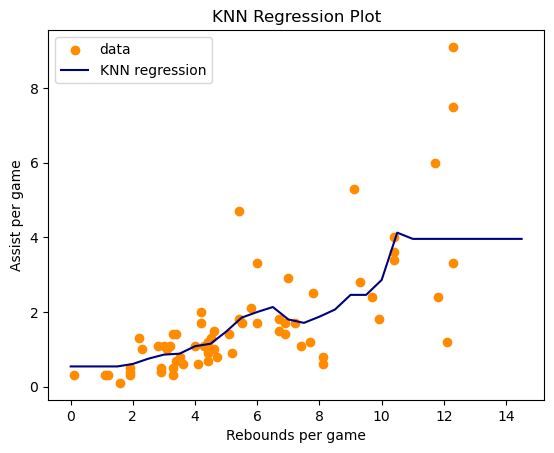

In [98]:
df = pd.read_csv("NBA_2024_per_game(03-01-2024).csv")
df = df.dropna()
df_center = df[df['Pos'] == 'C']
X = df_center['TRB'].values.reshape(-1,1)
y = df_center['AST'].values
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X, y)
X_test = np.arange(0,15,0.5).reshape(-1,1)
y_pred = knn.predict(X_test)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='KNN regression')
plt.xlabel('Rebounds per game')
plt.ylabel('Assist per game')
plt.title('KNN Regression Plot')
plt.legend()
plt.show()

Using the k-nearest-neighbors regression plot, you can see that there is a trend for a majority of the Centers in the NBA, but there are also quite a few outliers. I chose the y-axis to be assist per game since Centers are not known for their assists, but there are quite a few centers who had more than 5 assist per game. The biggest outliers are players such as Nikola Jokić, Domantis Sabonis, and Joel Embiid. The k-nearest-neighbors regression plot can predict the trend of rebounds per game to assist per game, but the three aforementioned Centers are outliers and elite passers at their position.